In [1]:
import sqlite3
import pandas as pd
from datetime import date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.ensemble import GradientBoostingRegressor
import statsmodels.api as sm
import os

# Base de Dados Kaggle - Produção de Oleo no Brasil

In [2]:
database = "Datasets/brazil_oil_production.sqlite"
conn = sqlite3.connect(database)
df = pd.read_sql("select * from production", con=conn)
df

,Year,Month,State,Basin,Field,Well,Environment,Installation,Oil (m³),Condensate oil (m³),...,Non-associated petroleum gas (Mm³),Water (m³),Gas injection (Mm³),Secondary recovery water injection (m³),Wastewater injection (m³),CO2 injection (Mm³),Nitrogen injection (Mm³),Steam injection (t),Polymer injection (m³),Others fluids injection (m³)
0,2019,4,AL,Alagoas,ANAMBÉ,1-BRSA-313D-AL,Land,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2019,4,AL,Alagoas,ANAMBÉ,1-BRSA-513D-AL,Land,Estação Coletora de Furado,None,None,...,360.7508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
2,2019,4,AL,Alagoas,ANAMBÉ,7-ANB-10D-AL,Land,Estação Coletora de Furado,177.915,None,...,NaN,590.94500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
3,2019,4,AL,Alagoas,ANAMBÉ,7-ANB-11-AL,Land,Estação Coletora de Furado,89.499,None,...,NaN,203.39900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,2019,4,AL,Alagoas,ANAMBÉ,7-ANB-12D-AL,Land,Estação Coletora de Furado,123.503,None,...,NaN,302.64700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645984,2018,12,SP,Santos,SUDOESTE DE SAPINHOÁ,8-SPH-24D-SPS,Sea,FPSO CIDADE DE SÃO PAULO,None,None,...,NaN,NaN,NaN,2331.90006,NaN,NaN,NaN,NaN,NaN,None
645985,2018,12,SP,Santos,SUDOESTE DE SAPINHOÁ,8-SPH-9-SPS,Sea,FPSO CIDADE DE ILHA BELA,None,None,...,NaN,NaN,1593.00734,NaN,NaN,670.53673,NaN,NaN,NaN,None
645986,2018,12,SP,Santos,SUDOESTE DE SAPINHOÁ,9-BRSA-1037-SPS,Sea,FPSO CIDADE DE ILHA BELA,None,None,...,NaN,NaN,NaN,3600.45721,NaN,NaN,NaN,NaN,NaN,None
645987,2018,12,SP,Santos,SUDOESTE DE SAPINHOÁ,9-BRSA-1043-SPS,Sea,FPSO CIDADE DE SÃO PAULO,None,None,...,NaN,NaN,1024.93086,NaN,NaN,375.71963,NaN,NaN,NaN,None


In [3]:
df.columns

Index(['Year', 'Month', 'State', 'Basin', 'Field', 'Well', 'Environment',
       'Installation', 'Oil (m³)', 'Condensate oil (m³)',
       'Associated petroleum gas (Mm³)', 'Non-associated petroleum gas (Mm³)',
       'Water (m³)', 'Gas injection (Mm³)',
       'Secondary recovery water injection (m³)', 'Wastewater injection (m³)',
       'CO2 injection (Mm³)', 'Nitrogen injection (Mm³)',
       'Steam injection (t)', 'Polymer injection (m³)',
       'Others fluids injection (m³)'],
      dtype='object')

In [4]:
df['Day'] = 1
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [5]:
df = df[['Date', 'State', 'Basin', 'Field', 'Well', 'Environment', 'Installation', 'Oil (m³)', 'Condensate oil (m³)', 'Associated petroleum gas (Mm³)', 'Non-associated petroleum gas (Mm³)', 'Water (m³)', 'Gas injection (Mm³)', 'Secondary recovery water injection (m³)', 'Wastewater injection (m³)', 'CO2 injection (Mm³)',  'Nitrogen injection (Mm³)', 'Steam injection (t)', 'Polymer injection (m³)', 'Others fluids injection (m³)']]

In [6]:
df.sort_values(by='Date')
df.set_index('Date', inplace=True)

In [7]:
df['Oil (m³)'] = pd.to_numeric(df['Oil (m³)'],errors = 'coerce')
df['Condensate oil (m³)'] = pd.to_numeric(df['Condensate oil (m³)'],errors = 'coerce')
df['Others fluids injection (m³)'] = pd.to_numeric(df['Others fluids injection (m³)'],errors = 'coerce')

C:\Users\arnaldo.junior\AppData\Local\Temp\ipykernel_23140\1787466856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Oil (m³)'] = pd.to_numeric(df['Oil (m³)'],errors = 'coerce')
C:\Users\arnaldo.junior\AppData\Local\Temp\ipykernel_23140\1787466856.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Condensate oil (m³)'] = pd.to_numeric(df['Condensate oil (m³)'],errors = 'coerce')
C:\Users\arnaldo.junior\AppData\Local\Temp\ipykernel_23140\1787466856.py:3: SettingWithCopyWarning: 
A value is tryi

In [8]:
df.describe()

,Oil (m³),Condensate oil (m³),Associated petroleum gas (Mm³),Non-associated petroleum gas (Mm³),Water (m³),Gas injection (Mm³),Secondary recovery water injection (m³),Wastewater injection (m³),CO2 injection (Mm³),Nitrogen injection (Mm³),Steam injection (t),Polymer injection (m³),Others fluids injection (m³)
count,464767.000000,18865.000000,436858.000000,14725.000000,409776.000000,5078.000000,66881.000000,12841.000000,1545.000000,2.000000,3651.000000,495.000000,1.00
mean,5761.974359,4152.939551,845.014194,6350.342030,4786.774576,14519.807971,37664.982042,6814.940380,5959.323322,13245.000000,983.903037,433.132772,49.02
std,15136.099953,14395.120018,3207.912696,10621.491785,11836.465466,22301.025107,54006.141858,19061.886862,7354.889766,8192.539167,758.683430,310.460960,NaN
min,0.000210,0.000020,0.000010,0.001420,-0.026800,0.000230,0.005370,1.000000,0.011660,7452.000000,3.000000,0.020000,49.02
25%,78.840000,171.000000,2.608000,95.146610,53.069000,555.352395,1352.000000,214.000000,182.888060,10348.500000,474.682000,109.500000,49.02
50%,481.602000,528.000000,59.563050,1443.360040,487.224500,3185.238505,7694.114000,546.000000,1444.745300,13245.000000,777.704000,434.000000,49.02
75%,3760.330000,976.000000,512.498953,7204.755710,3517.505500,17789.888348,59340.000000,877.000000,10798.894040,16141.500000,1292.474500,701.500000,49.02
max,272888.001840,99995.000000,190000.000000,78298.000000,258875.633890,106095.354000,327904.779000,134224.000000,67407.000000,19038.000000,6039.000000,999.000000,49.02


In [9]:
df_novo = df[df['Water (m³)'].notnull()]

In [10]:
df_novo = df_novo[df_novo['Environment'] == 'Sea']

In [11]:
df_novo.describe()

,Oil (m³),Condensate oil (m³),Associated petroleum gas (Mm³),Non-associated petroleum gas (Mm³),Water (m³),Gas injection (Mm³),Secondary recovery water injection (m³),Wastewater injection (m³),CO2 injection (Mm³),Nitrogen injection (Mm³),Steam injection (t),Polymer injection (m³),Others fluids injection (m³)
count,335210.000000,6202.000000,321461.000000,5003.000000,340596.000000,33.000000,21.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,5907.430665,1243.534117,780.727951,14435.600065,4806.480986,872.202654,5588.654476,NaN,NaN,NaN,NaN,NaN,NaN
std,13502.611513,1801.674234,2582.082942,14128.477475,11420.524564,1155.953535,3348.516937,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000210,0.009000,0.000010,1.143400,-0.026800,42.144990,40.454000,NaN,NaN,NaN,NaN,NaN,NaN
25%,148.600000,245.517813,6.645600,2838.325535,42.100000,143.961000,2758.340000,NaN,NaN,NaN,NaN,NaN,NaN
50%,997.000000,522.990495,106.560000,8685.000000,410.800000,376.826060,5289.860000,NaN,NaN,NaN,NaN,NaN,NaN
75%,4919.875000,1529.272500,627.864200,24705.159830,4045.795000,957.383000,8275.010000,NaN,NaN,NaN,NaN,NaN,NaN
max,272888.001840,22574.254000,92450.687090,64703.426960,258875.633890,4529.698000,10262.820000,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_novo.fillna(0, inplace=True)
df_novo.sort_index(inplace=True)

In [13]:
reg = GradientBoostingRegressor()

In [14]:
X_treino = df_novo[['Condensate oil (m³)', 'Associated petroleum gas (Mm³)', 'Non-associated petroleum gas (Mm³)', 'Water (m³)', 'Gas injection (Mm³)', 'Secondary recovery water injection (m³)', 'Wastewater injection (m³)', 'CO2 injection (Mm³)',  'Nitrogen injection (Mm³)', 'Steam injection (t)', 'Polymer injection (m³)', 'Others fluids injection (m³)']].loc['2017-10-01':'2020-01-01']
y_treino = df_novo['Oil (m³)'].loc['2017-10-01':'2020-01-01']
reg.fit(X_treino, y_treino)

GradientBoostingRegressor()

In [15]:
X_teste = df_novo[['Condensate oil (m³)', 'Associated petroleum gas (Mm³)', 'Non-associated petroleum gas (Mm³)', 'Water (m³)', 'Gas injection (Mm³)', 'Secondary recovery water injection (m³)', 'Wastewater injection (m³)', 'CO2 injection (Mm³)',  'Nitrogen injection (Mm³)', 'Steam injection (t)', 'Polymer injection (m³)', 'Others fluids injection (m³)']].loc['2020-01-01':]
y_teste = df_novo['Oil (m³)'].loc['2020-01-01':]

In [16]:
y_pred = reg.predict(X_teste)
y_pred_treino = reg.predict(X_treino)

In [17]:
y_pred = pd.DataFrame(y_pred)
y_pred.index = X_teste.index
y_pred.columns = ['Pred_Oil (m³)']

In [18]:
y_pred_treino = pd.DataFrame(y_pred_treino)
y_pred_treino.index = X_treino.index
y_pred_treino.columns = ['Pred_Oil (m³)']

In [19]:
df_treino = df_novo[['State', 'Basin', 'Field', 'Well', 'Environment', 'Installation', 'Oil (m³)']].loc['2017-10-01':'2020-01-01']
df_treino['Pred_Oil (m³)'] = y_pred_treino['Pred_Oil (m³)']
df_treino.sort_index(inplace=True)
df_treino

,State,Basin,Field,Well,Environment,Installation,Oil (m³),Pred_Oil (m³)
Date,,,,,,,,
2017-10-01,RJ,Campos,MARLIM SUL,7-MLS-97HP-RJS,Sea,PETROBRAS 51,14502.19300,14713.468853
2017-10-01,RJ,Campos,MARLIM SUL,7-MLS-95H-RJS,Sea,PETROBRAS 51,16353.59200,17012.057534
2017-10-01,RJ,Campos,MARLIM SUL,7-MLS-93HP-RJS,Sea,PETROBRAS 51,17108.32000,16042.121887
2017-10-01,RJ,Campos,MARLIM SUL,7-MLS-79HP-RJS,Sea,PETROBRAS 26,119.07316,356.938013
2017-10-01,RJ,Campos,MARLIM SUL,7-MRL-159HP-RJS,Sea,PETROBRAS 18,140.72148,300.080273
...,...,...,...,...,...,...,...,...
2020-01-01,RJ,Campos,BARRACUDA,7-BR-51HP-RJS,Sea,PETROBRAS 43,10488.30382,12644.178457
2020-01-01,RJ,Campos,BARRACUDA,7-BR-53HPA-RJS,Sea,PETROBRAS 43,3744.17900,5002.514679
2020-01-01,RJ,Campos,BARRACUDA,7-BR-56H-RJS,Sea,PETROBRAS 43,15130.03095,16070.732629


In [20]:
df_pred = df_novo[['State', 'Basin', 'Field', 'Well', 'Environment', 'Installation', 'Oil (m³)']].loc['2020-01-01':]
df_pred['Pred_Oil (m³)'] = y_pred['Pred_Oil (m³)']
df_pred.sort_index(inplace=True)
df_pred

,State,Basin,Field,Well,Environment,Installation,Oil (m³),Pred_Oil (m³)
Date,,,,,,,,
2020-01-01,RJ,Campos,RONCADOR,6-BRSA-963DA-RJS,Sea,PETROBRAS 52,17507.28900,23888.077468
2020-01-01,RJ,Campos,POLVO,7-POL-32HP-RJS,Sea,Polvo A,3052.24236,6791.234075
2020-01-01,RJ,Campos,POLVO,7-POL-36HP-RJS,Sea,Polvo A,6644.19007,810.294380
2020-01-01,RJ,Campos,POLVO,7-POL-2HPB-RJS,Sea,Polvo A,4749.13832,6791.234075
2020-01-01,RJ,Campos,POLVO,7-POL-38HP-RJS,Sea,Polvo A,1598.98965,79.557883
...,...,...,...,...,...,...,...,...
2020-07-01,RJ,Campos,CARATINGA,7-CRT-21HP-RJS,Sea,PETROBRAS 48,7279.12500,12674.362710
2020-07-01,RJ,Campos,CARATINGA,7-CRT-26HP-RJS,Sea,PETROBRAS 48,8382.48100,15323.612933
2020-07-01,RJ,Campos,CARATINGA,7-CRT-49-RJS,Sea,PETROBRAS 48,3668.18352,6952.545973


In [21]:
df_treino['Installation'].replace(0,'Inutil', inplace=True)
df_treino = df_treino[df_treino['Basin'] == 'Santos']
df_treino = df_treino[df_treino['Installation'].str.contains('FPSO')]
df_treino['Installation'].unique()

array(['FPSO CIDADE DE ANGRA DOS REIS', 'FPSO CIDADE DE PARATY',
       'FPSO CIDADE DE MANGARATIBA', 'FPSO CIDADE DE SANTOS',
       'FPSO CIDADE DE ITAJAÍ', 'FPSO CIDADE DE ILHA BELA',
       'FPSO PIONEIRO DE LIBRA', 'FPSO CIDADE DE SÃO PAULO',
       'FPSO CIDADE DE SAQUAREMA', 'FPSO CIDADE DE ITAGUAÍ',
       'FPSO CIDADE DE MARICÁ'], dtype=object)

In [22]:
df_pred = df_pred[df_pred['Basin'] == 'Santos']
df_pred = df_pred[df_pred['Installation'].str.contains('FPSO')]
df_pred['Installation'].unique()

array(['FPSO CIDADE DE PARATY', 'FPSO CIDADE DE ANGRA DOS REIS',
       'FPSO CIDADE DE SÃO PAULO', 'FPSO CIDADE DE SAQUAREMA',
       'FPSO CIDADE DE ITAJAÍ', 'FPSO CIDADE DE SANTOS',
       'FPSO CIDADE DE MARICÁ', 'FPSO CIDADE DE ILHA BELA',
       'FPSO CIDADE DE ITAGUAÍ', 'FPSO CIDADE DE MANGARATIBA',
       'FPSO PIONEIRO DE LIBRA'], dtype=object)

In [23]:
df_treino.reset_index(inplace=True)
df_treino

,Date,State,Basin,Field,Well,Environment,Installation,Oil (m³),Pred_Oil (m³)
0,2017-10-01,SP,Santos,LULA,3-BRSA-865A-RJS,Sea,FPSO CIDADE DE ANGRA DOS REIS,83156.02600,87828.940763
1,2017-10-01,SP,Santos,LULA,7-LL-15D-RJS,Sea,FPSO CIDADE DE PARATY,133727.95600,117600.769483
2,2017-10-01,SP,Santos,LULA,7-LL-17D-RJS,Sea,FPSO CIDADE DE PARATY,91054.20500,79397.291000
3,2017-10-01,SP,Santos,LULA,7-LL-22D-RJS,Sea,FPSO CIDADE DE PARATY,101951.43100,98299.167983
4,2017-10-01,SP,Santos,LULA,7-LL-31D-RJS,Sea,FPSO CIDADE DE MANGARATIBA,73627.50800,100193.558964
...,...,...,...,...,...,...,...,...,...
2105,2020-01-01,SP,Santos,LULA,7-LL-8H-RJS,Sea,FPSO CIDADE DE ANGRA DOS REIS,21991.58457,34220.825571
2106,2020-01-01,SP,Santos,LULA,7-LL-95D-RJS,Sea,FPSO CIDADE DE ANGRA DOS REIS,92974.33076,75785.765301
2107,2020-01-01,SP,Santos,LULA,8-LL-37D-RJS,Sea,FPSO CIDADE DE ITAGUAÍ,33388.42100,40732.323534
2108,2020-01-01,SP,Santos,LULA,8-LL-81D-RJS,Sea,FPSO CIDADE DE SAQUAREMA,94967.01744,113592.130292


In [24]:
df_treino['Date'].unique()

array(['2017-10-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2018-02-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-06-01T00:00:00.000000000', '2018-07-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-10-01T00:00:00.000000000', '2018-11-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-04-01T00:00:00.000000000', '2019-05-01T00:00:00.000000000',
       '2019-06-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-08-01T00:00:00.000000000', '2019-09-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-01-01

In [25]:
df_pred.reset_index(inplace=True)
df_pred

,Date,State,Basin,Field,Well,Environment,Installation,Oil (m³),Pred_Oil (m³)
0,2020-01-01,SP,Santos,ANC_LULA,3-BRSA-821-RJS,Sea,FPSO CIDADE DE PARATY,246.96014,1700.973783
1,2020-01-01,SP,Santos,ANC_LULA,3-BRSA-496-RJS,Sea,FPSO CIDADE DE ANGRA DOS REIS,475.04340,2818.772403
2,2020-01-01,SP,Santos,SUDOESTE DE SAPINHOÁ,7-SPH-5-SPS,Sea,FPSO CIDADE DE SÃO PAULO,1149.24918,5445.580069
3,2020-01-01,SP,Santos,ANC_LULA,7-LL-106DA-RJS,Sea,FPSO CIDADE DE SAQUAREMA,0.00193,-144.101614
4,2020-01-01,SP,Santos,BAÚNA,1-BRSA-607-SPS,Sea,FPSO CIDADE DE ITAJAÍ,11900.03200,7141.271987
...,...,...,...,...,...,...,...,...,...
962,2020-07-01,SP,Santos,LULA,8-LL-37D-RJS,Sea,FPSO CIDADE DE ITAGUAÍ,29844.08600,39521.376346
963,2020-07-01,SP,Santos,LULA,8-LL-81D-RJS,Sea,FPSO CIDADE DE SAQUAREMA,93588.70366,113592.130292
964,2020-07-01,SP,Santos,LULA,8-LL-87D-RJS,Sea,FPSO CIDADE DE MARICÁ,119766.85965,99838.217984
965,2020-07-01,SP,Santos,LULA,7-LL-85-RJS,Sea,FPSO CIDADE DE SAQUAREMA,18834.97704,44034.844313


In [26]:
# df_pred.to_excel('Dados_Banco.xlsx')

In [27]:
plataformas = df_pred['Installation'].unique()
plataformas

array(['FPSO CIDADE DE PARATY', 'FPSO CIDADE DE ANGRA DOS REIS',
       'FPSO CIDADE DE SÃO PAULO', 'FPSO CIDADE DE SAQUAREMA',
       'FPSO CIDADE DE ITAJAÍ', 'FPSO CIDADE DE SANTOS',
       'FPSO CIDADE DE MARICÁ', 'FPSO CIDADE DE ILHA BELA',
       'FPSO CIDADE DE ITAGUAÍ', 'FPSO CIDADE DE MANGARATIBA',
       'FPSO PIONEIRO DE LIBRA'], dtype=object)

In [28]:
legenda = {'FPSO CIDADE DE PARATY': 120000, 'FPSO CIDADE DE ANGRA DOS REIS': 100000, 'FPSO CIDADE DE SÃO PAULO': 108000,
           'FPSO CIDADE DE SAQUAREMA': 150000, 'FPSO CIDADE DE ITAJAÍ': 80000, 'FPSO CIDADE DE SANTOS': 35000,
           'FPSO CIDADE DE MARICÁ': 150000, 'FPSO CIDADE DE ILHA BELA': 150000 , 'FPSO CIDADE DE ITAGUAÍ': 150000,
           'FPSO CIDADE DE MANGARATIBA': 150000, 'FPSO PIONEIRO DE LIBRA': 50000}

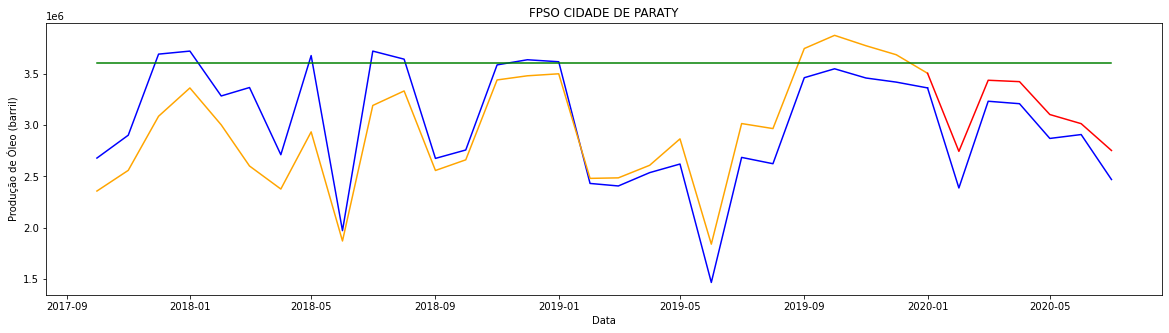

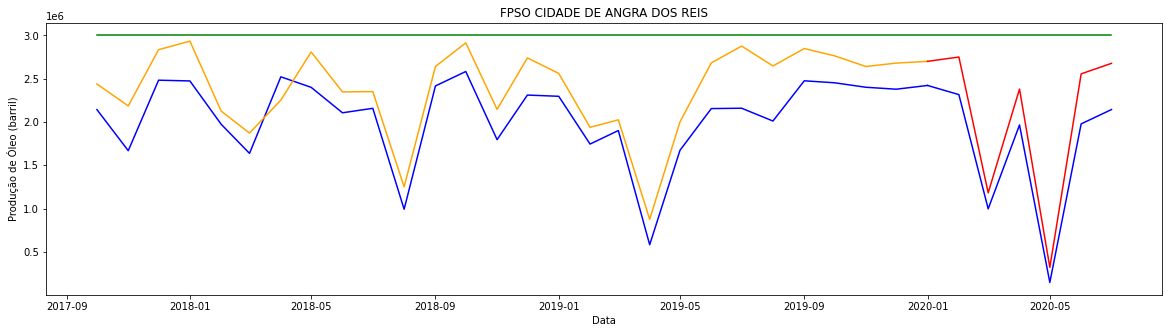

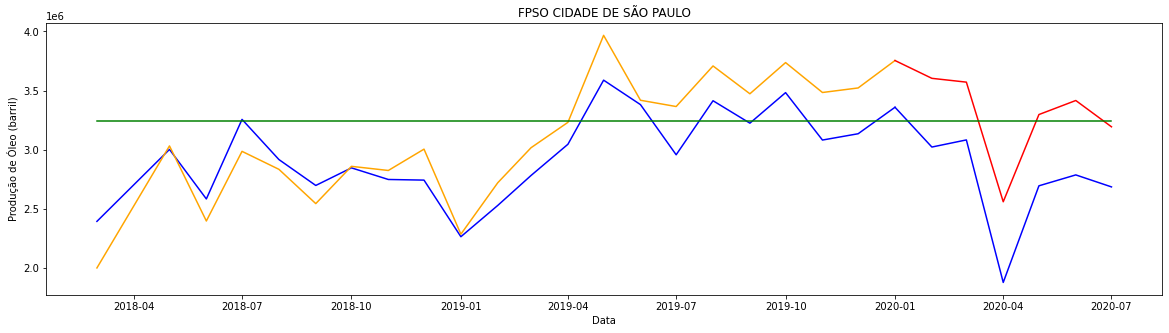

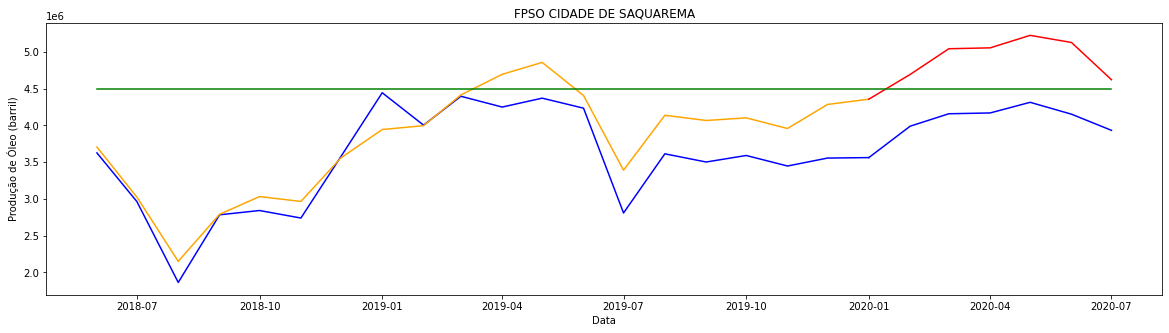

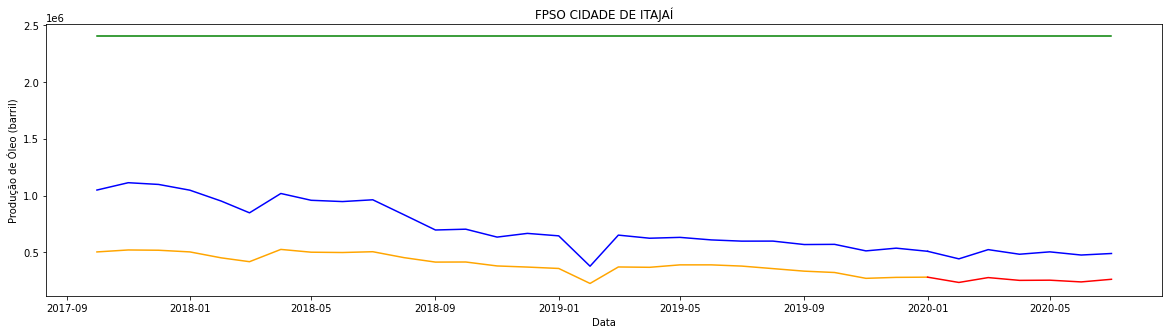

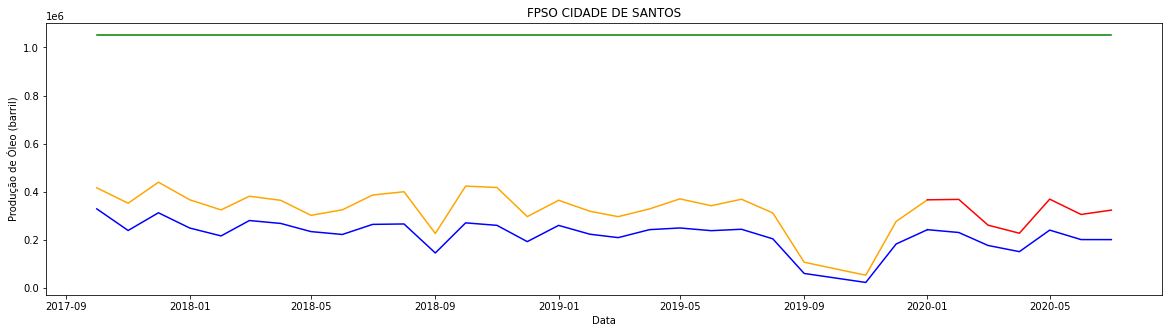

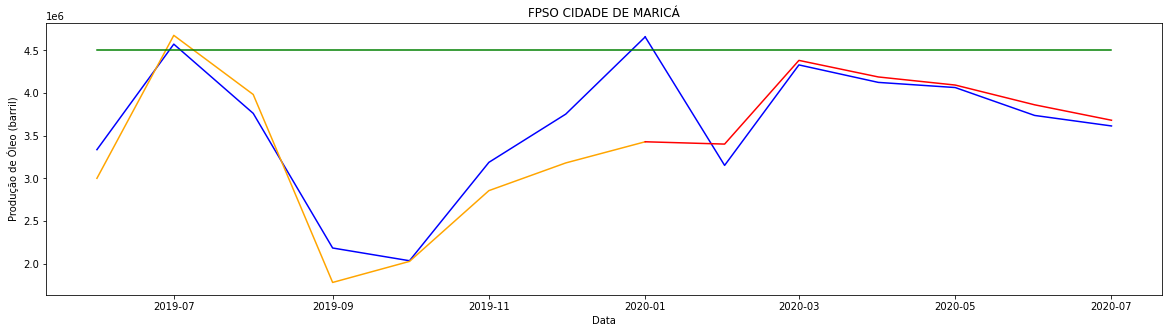

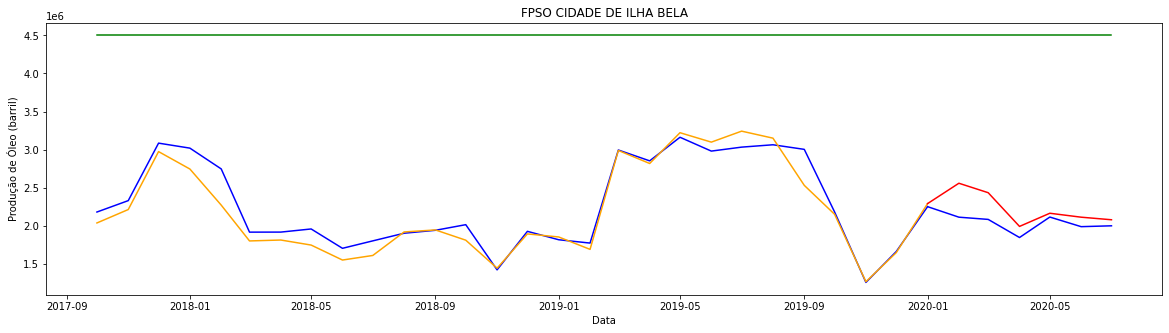

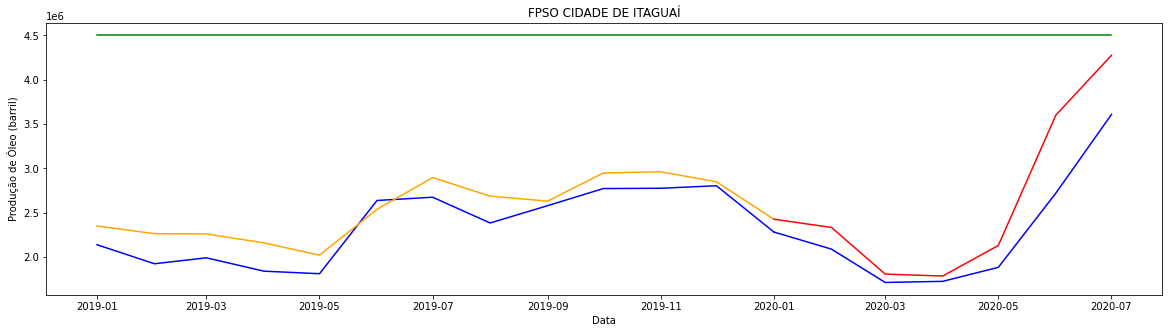

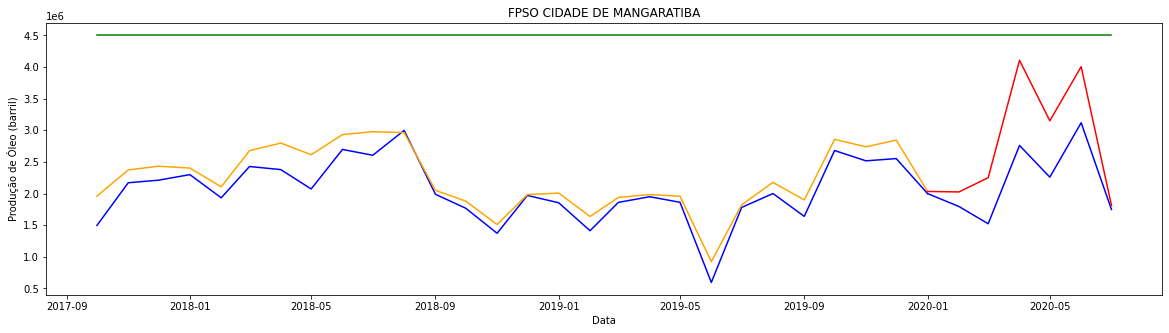

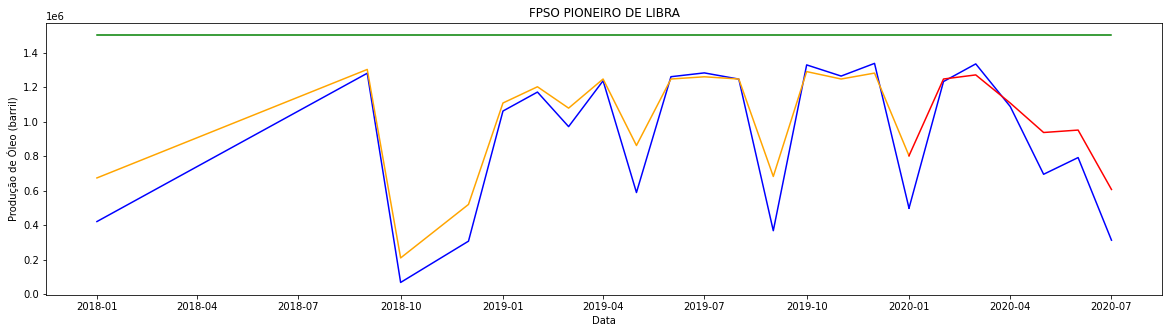

In [32]:
for nome in plataformas:
    df_soma_treino = df_treino[df_treino['Installation'] == nome].groupby(by=['Date']).sum()
    df_soma_pred = df_pred[df_pred['Installation'] == nome].groupby(by=['Date']).sum()
    df_soma_treino['Oil (barril)'] = df_soma_treino['Oil (m³)'].values*6.29
    df_soma_treino['Pred_Oil (barril)'] = df_soma_treino['Pred_Oil (m³)'].values*6.29
    df_soma_treino['Valor_Otimo'] = legenda[nome]*30
    df_soma_pred['Oil (barril)'] = df_soma_pred['Oil (m³)'].values*6.29
    df_soma_pred['Pred_Oil (barril)'] = df_soma_pred['Pred_Oil (m³)'].values*6.29
    df_soma_pred['Valor_Otimo'] = legenda[nome]*30
    plt.figure(figsize=(20,5))
    plt.plot(df_soma_treino['Oil (barril)'], color='blue')
    plt.plot(df_soma_treino['Pred_Oil (barril)'], color='orange')
    plt.plot(df_soma_pred['Oil (barril)'], color = 'blue')
    plt.plot(df_soma_pred['Pred_Oil (barril)'], color='red')
    plt.plot(pd.concat([df_soma_treino['Valor_Otimo'],df_soma_pred['Valor_Otimo']]),color='green')
    plt.title(nome)
    plt.xlabel('Data')
    plt.ylabel('Produção de Óleo (barril)')
    plt.show()

In [30]:
rmse = np.sqrt(mean_squared_error(y_teste, y_pred))
print('RMSE ::>> '+str(rmse))
print('Score R2 ::>> '+str(r2_score(y_teste, y_pred)))
print('MAPE ::>> '+str(mean_absolute_percentage_error(y_teste, y_pred)))

RMSE ::>> 9847.234996252399
Score R2 ::>> 0.883873570662741
MAPE ::>> 9.660498165027309e+16
